

### 1. **Data Splitting** 
   Given the dataset $ (X, y) $, we split it into training and test sets:
   $$
   X_{\text{train}}, X_{\text{test}}, y_{\text{train}}, y_{\text{test}} = \text{train\_test\_split}(X, y)
   $$
   where $ X \in \mathbb{R}^{n \times d} $ (features) and $ y \in \{0, 1\}^n $ (binary labels), with $ n $ being the number of samples and $ d $ the number of features.

---

### 2. **Forward Propagation in Neural Network**

   The neural network has three layers:
   - **Input layer** with $ d $ inputs
   - **Hidden layers** with sizes $ h_1 $ and $ h_2 $
   - **Output layer** with 1 neuron (for binary classification)

   For an input $ \mathbf{x} \in \mathbb{R}^d $:

   1. **Layer 1 (Input to First Hidden Layer)**:
      $$
      \mathbf{z}^{(1)} = \mathbf{x} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}
      $$
      $$
      \mathbf{a}^{(1)} = \sigma(\mathbf{z}^{(1)})
      $$
      where:
      - $ \mathbf{W}^{(1)} \in \mathbb{R}^{d \times h_1} $ are the weights.
      - $ \mathbf{b}^{(1)} \in \mathbb{R}^{h_1} $ are the biases.
      - $ \sigma(x) = \frac{1}{1 + e^{-x}} $ is the sigmoid activation function.

   2. **Layer 2 (First to Second Hidden Layer)**:
      $$
      \mathbf{z}^{(2)} = \mathbf{a}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)}
      $$
      $$
      \mathbf{a}^{(2)} = \sigma(\mathbf{z}^{(2)})
      $$
      where:
      - $ \mathbf{W}^{(2)} \in \mathbb{R}^{h_1 \times h_2} $ and $ \mathbf{b}^{(2)} \in \mathbb{R}^{h_2} $ are the weights and biases for the second layer.

   3. **Layer 3 (Second Hidden Layer to Output)**:
      $$
      \mathbf{z}^{(3)} = \mathbf{a}^{(2)} \mathbf{W}^{(3)} + \mathbf{b}^{(3)}
      $$
      $$
      \mathbf{a}^{(3)} = \sigma(\mathbf{z}^{(3)})
      $$
      where:
      - $ \mathbf{W}^{(3)} \in \mathbb{R}^{h_2 \times 1} $ and $ \mathbf{b}^{(3)} \in \mathbb{R}^{1} $ are the weights and biases for the output layer.
      - $ \mathbf{a}^{(3)} $ is the predicted output.

---

### 3. **Loss Function (Mean Squared Error)**

   For binary labels, the Mean Squared Error (MSE) loss for predictions $ \hat{y} $ and true labels $ y $ is:
   $$
   L(\hat{y}, y) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
   $$

---

### 4. **Backpropagation and Gradient Descent**

   To update weights and biases, we calculate the error gradients and adjust weights in the opposite direction. Let $ \delta^{(k)} $ denote the gradient of the error with respect to the weighted sum $ \mathbf{z}^{(k)} $ in layer $ k $:

   - **Output Layer (Layer 3)**:
     $$
     \delta^{(3)} = (\hat{y} - y) \cdot \sigma'(\mathbf{z}^{(3)})
     $$
     where $ \sigma'(x) = \sigma(x)(1 - \sigma(x)) $ is the derivative of the sigmoid.

   - **Second Hidden Layer (Layer 2)**:
     $$
     \delta^{(2)} = \delta^{(3)} \mathbf{W}^{(3)^T} \cdot \sigma'(\mathbf{z}^{(2)})
     $$

   - **First Hidden Layer (Layer 1)**:
     $$
     \delta^{(1)} = \delta^{(2)} \mathbf{W}^{(2)^T} \cdot \sigma'(\mathbf{z}^{(1)})
     $$

   Using these gradients, we update weights and biases as follows:
   - **Weight updates**:
     $$
     \mathbf{W}^{(k)} \leftarrow \mathbf{W}^{(k)} + \eta \cdot \mathbf{a}^{(k-1)^T} \delta^{(k)}
     $$
   - **Bias updates**:
     $$
     \mathbf{b}^{(k)} \leftarrow \mathbf{b}^{(k)} + \eta \cdot \delta^{(k)}
     $$
   where $ \eta $ is the learning rate.

---

### 5. **Metrics Calculation**

   After training, the network's performance is evaluated on the test data using:
   - **Accuracy**: $ \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}} $
   - **Precision**: $ \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} $
   - **Recall**: $ \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} $
   - **F1 Score**: $ F1 = 2 \cdot \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $

   where TP, TN, FP, and FN represent counts of true positives, true negatives, false positives, and false negatives, respectively.

### 6. **Confusion Matrix**

   The confusion matrix for binary classification shows:
   $$
   \begin{bmatrix}
   \text{TP} & \text{FP} \\
   \text{FN} & \text{TN}
   \end{bmatrix}
   $$
This matrix provides insight into the distribution of correct and incorrect predictions.

In [2]:
import pandas as pd
import random

# Define the 7-segment code for digits 0-9 (positive samples)
valid_patterns = [
    [1, 1, 1, 1, 1, 1, 0],  # 0
    [0, 1, 1, 0, 0, 0, 0],  # 1
    [1, 1, 0, 1, 1, 0, 1],  # 2
    [1, 1, 1, 1, 0, 0, 1],  # 3
    [0, 1, 1, 0, 0, 1, 1],  # 4
    [1, 0, 1, 1, 0, 1, 1],  # 5
    [1, 0, 1, 1, 1, 1, 1],  # 6
    [1, 1, 1, 0, 0, 0, 0],  # 7
    [1, 1, 1, 1, 1, 1, 1],  # 8
    [1, 1, 1, 1, 0, 1, 1],  # 9
]
valid_labels = [1] * len(valid_patterns)

# Oversample valid patterns by duplicating them
oversampled_valid_patterns = valid_patterns * 10  # Duplicates each pattern 10 times
oversampled_valid_labels = [1] * len(oversampled_valid_patterns)

# Set for valid patterns to avoid duplicate generation for invalid samples
valid_patterns_set = {tuple(pattern) for pattern in valid_patterns}

# Generate 100 unique invalid patterns
invalid_patterns = []
while len(invalid_patterns) < 100:
    pattern = tuple(random.choices([0, 1], k=7))
    if pattern not in valid_patterns_set:
        invalid_patterns.append(list(pattern))

invalid_labels = [0] * len(invalid_patterns)

# Combine oversampled valid and invalid patterns with labels
patterns = oversampled_valid_patterns + invalid_patterns
labels = oversampled_valid_labels + invalid_labels

# Create a DataFrame
df = pd.DataFrame(patterns, columns=['a', 'b', 'c', 'd', 'e', 'f', 'g'])
df['label'] = labels

# Shuffle the dataset to avoid bias in ordering
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the dataset to a CSV file
df.to_csv("balanced_seven_segment_digit_dataset.csv", index=False)
print("Balanced and shuffled dataset saved as 'balanced_seven_segment_digit_dataset.csv'")


Balanced and shuffled dataset saved as 'balanced_seven_segment_digit_dataset.csv'


Epoch 0, Loss: 0.3979
Epoch 100, Loss: 0.1989
Epoch 200, Loss: 0.1473
Epoch 300, Loss: 0.1219
Epoch 400, Loss: 0.1050


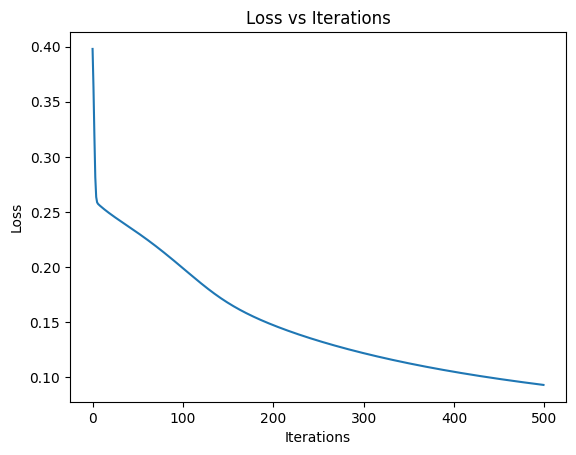

{'accuracy': 0.95, 'precision': np.float64(0.9090909090909091), 'recall': np.float64(1.0), 'f1': np.float64(0.9523809523809523)}


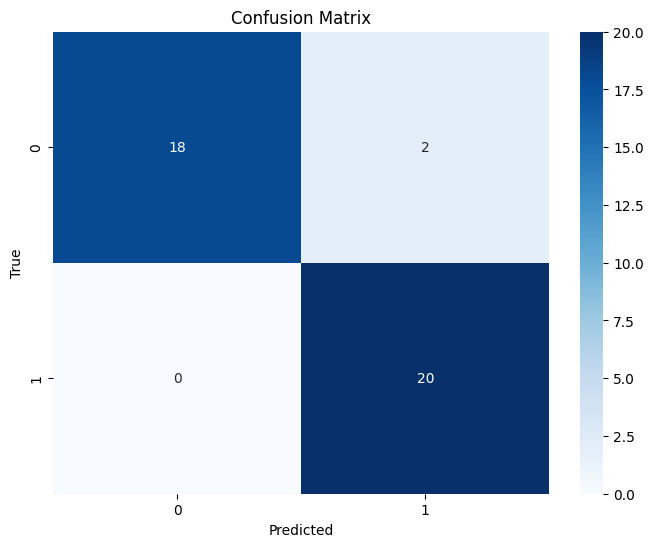

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Load the data
data = pd.read_csv('/home/uttam/Soft_Computing/Assignment5/balanced_seven_segment_digit_dataset.csv')
X = data.drop(columns=['label']).values
y = data['label'].values

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Mean Squared Error loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Neural Network class
class NeuralNetwork:
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size, learning_rate):
        self.weights1 = np.random.randn(input_size, hidden1_size)
        self.bias1 = np.zeros((1, hidden1_size))
        self.weights2 = np.random.randn(hidden1_size, hidden2_size)
        self.bias2 = np.zeros((1, hidden2_size))
        self.weights3 = np.random.randn(hidden2_size, output_size)
        self.bias3 = np.zeros((1, output_size))
        self.learning_rate = learning_rate

    def forward(self, X):
        self.z1 = np.dot(X, self.weights1) + self.bias1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.weights3) + self.bias3
        self.a3 = sigmoid(self.z3)
        return self.a3

    def backward(self, X, y, output):
        output_error = y - output
        output_delta = output_error * sigmoid_derivative(output)

        a2_error = np.dot(output_delta, self.weights3.T)
        a2_delta = a2_error * sigmoid_derivative(self.a2)

        a1_error = np.dot(a2_delta, self.weights2.T)
        a1_delta = a1_error * sigmoid_derivative(self.a1)

        # Update weights and biases
        self.weights3 += self.learning_rate * np.dot(self.a2.T, output_delta)
        self.bias3 += self.learning_rate * np.sum(output_delta, axis=0)
        self.weights2 += self.learning_rate * np.dot(self.a1.T, a2_delta)
        self.bias2 += self.learning_rate * np.sum(a2_delta, axis=0)
        self.weights1 += self.learning_rate * np.dot(X.T, a1_delta)
        self.bias1 += self.learning_rate * np.sum(a1_delta, axis=0)

    def train(self, X, y, epochs):
        loss_history = []
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            loss = mse_loss(y, output)
            loss_history.append(loss)
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss:.4f}')
        return loss_history

# Plotting function for loss
def plot_loss(loss_history):
    plt.plot(loss_history)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Loss vs Iterations')
    plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize and train the model on the training set
nn = NeuralNetwork(input_size=X.shape[1], hidden1_size=10, hidden2_size=10, output_size=1, learning_rate=0.01)
epochs = 500
loss_history = nn.train(X_train, y_train.reshape(-1, 1), epochs)

# Plot training loss over iterations
plot_loss(loss_history)

# Evaluate the model on the test set
y_pred = nn.forward(X_test)
y_pred = np.round(y_pred).flatten()

# Calculate evaluation metrics
metrics = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'f1': f1_score(y_test, y_pred)
}

# Print metrics
print(metrics)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Epoch 0, Loss: 0.3415586197906593
Epoch 100, Loss: 0.1785328954550632
Epoch 200, Loss: 0.12631620970416443
Epoch 300, Loss: 0.09494299209921828
Epoch 400, Loss: 0.06734364645841881


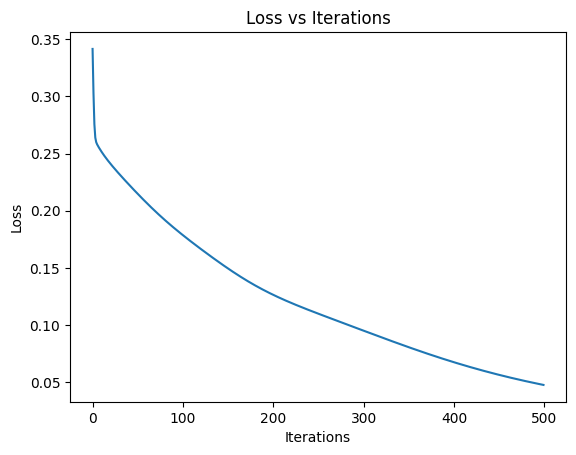

Epoch 0, Loss: 0.05212547398337688
Epoch 100, Loss: 0.0403284531725682
Epoch 200, Loss: 0.03207117013262749
Epoch 300, Loss: 0.025771533211241177
Epoch 400, Loss: 0.020778202723924187
Epoch 0, Loss: 0.014078153562437676
Epoch 100, Loss: 0.011237354823932304
Epoch 200, Loss: 0.009327905318501025
Epoch 300, Loss: 0.00781491339894504
Epoch 400, Loss: 0.0065868365598151235
Epoch 0, Loss: 0.00516649053119249
Epoch 100, Loss: 0.004191929579943085
Epoch 200, Loss: 0.0035403559126520505
Epoch 300, Loss: 0.0030410469904816246
Epoch 400, Loss: 0.0026494189449469668
Epoch 0, Loss: 0.004566282994504128
Epoch 100, Loss: 0.002758493983003406
Epoch 200, Loss: 0.002325051747924217
Epoch 300, Loss: 0.0020179289890615276
Epoch 400, Loss: 0.0017800199078234532
Epoch 0, Loss: 0.003252723512686329
Epoch 100, Loss: 0.0018197694429583626
Epoch 200, Loss: 0.0015923988713202532
Epoch 300, Loss: 0.0014215996663650746
Epoch 400, Loss: 0.0012841714797249733


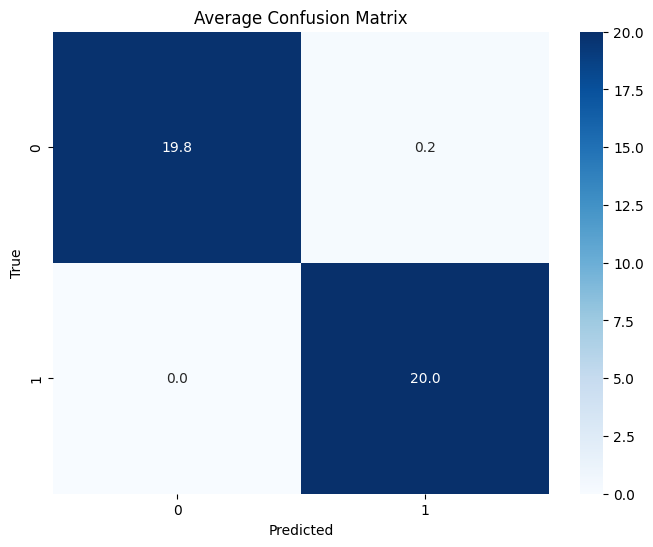

{'accuracy': np.float64(0.9949999999999999), 'precision': np.float64(0.9904761904761905), 'recall': np.float64(1.0), 'f1': np.float64(0.9951219512195122)}


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Load the data
data = pd.read_csv('/home/uttam/Soft_Computing/Assignment5/balanced_seven_segment_digit_dataset.csv')
X = data.drop(columns=['label']).values
y = data['label'].values

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Mean Squared Error loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Neural Network class
class NeuralNetwork:
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size, learning_rate):
        self.weights1 = np.random.randn(input_size, hidden1_size)
        self.bias1 = np.zeros((1, hidden1_size))
        self.weights2 = np.random.randn(hidden1_size, hidden2_size)
        self.bias2 = np.zeros((1, hidden2_size))
        self.weights3 = np.random.randn(hidden2_size, output_size)
        self.bias3 = np.zeros((1, output_size))
        self.learning_rate = learning_rate

    def forward(self, X):
        self.z1 = np.dot(X, self.weights1) + self.bias1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.weights3) + self.bias3
        self.a3 = sigmoid(self.z3)
        return self.a3

    def backward(self, X, y, output):
        output_error = y - output
        output_delta = output_error * sigmoid_derivative(output)

        a2_error = np.dot(output_delta, self.weights3.T)
        a2_delta = a2_error * sigmoid_derivative(self.a2)

        a1_error = np.dot(a2_delta, self.weights2.T)
        a1_delta = a1_error * sigmoid_derivative(self.a1)

        self.weights3 += self.learning_rate * np.dot(self.a2.T, output_delta)
        self.bias3 += self.learning_rate * np.sum(output_delta, axis=0)
        self.weights2 += self.learning_rate * np.dot(self.a1.T, a2_delta)
        self.bias2 += self.learning_rate * np.sum(a2_delta, axis=0)
        self.weights1 += self.learning_rate * np.dot(X.T, a1_delta)
        self.bias1 += self.learning_rate * np.sum(a1_delta, axis=0)

    def train(self, X, y, epochs):
        loss_history = []
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            loss = mse_loss(y, output)
            loss_history.append(loss)
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')
        return loss_history

# Define parameters
input_size = X.shape[1]
hidden1_size = 10
hidden2_size = 10
output_size = 1
learning_rate = 0.01
epochs = 500

# Initialize and train the neural network
nn = NeuralNetwork(input_size, hidden1_size, hidden2_size, output_size, learning_rate)
loss_history = nn.train(X, y.reshape(-1, 1), epochs)

# Plotting loss vs iterations
plt.plot(loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.show()

# Perform N-fold cross-validation
def evaluate_model(X, y, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits)
    metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
    confusion_matrices = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        nn.train(X_train, y_train.reshape(-1, 1), epochs)
        y_pred = nn.forward(X_test)
        y_pred = np.round(y_pred).flatten()

        metrics['accuracy'].append(accuracy_score(y_test, y_pred))
        metrics['precision'].append(precision_score(y_test, y_pred))
        metrics['recall'].append(recall_score(y_test, y_pred))
        metrics['f1'].append(f1_score(y_test, y_pred))

        # Append the confusion matrix
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

    # Plot average confusion matrix
    avg_conf_matrix = np.mean(confusion_matrices, axis=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(avg_conf_matrix, annot=True, fmt=".1f", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Average Confusion Matrix')
    plt.show()

    return {metric: np.mean(values) for metric, values in metrics.items()}

metrics = evaluate_model(X, y)
print(metrics)
